In [29]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel("Psycology.xls")
df.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


In [31]:
#Before
print(f"Data size before cut is {df.shape[0]}")

#cut
df = df[~df.isin(['?']).any(axis=1)]

#After
print(f"Data size after cut is {df.shape[0]}")

Data size before cut is 502
Data size after cut is 467


In [32]:
cl = {
    'เพศ': 'Sex',
    'อายุ': 'Age',
    'เคยมีแฟนมาแล้ว  (คน)': 'GirlfriendCount',
    'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์': 'ExercisePerWeek',
    'ระยะเวลาการนอน': 'SleepingTime',
    'นิสิยการกินอาหาร': 'FoodEatingBehavior',
    'เคยคิดฆ่าตัวตาย': 'SuicidalThoughts',
    'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์': 'LibraryTimePerWeek',
    'ระดับความเครียดด้านการเงิน': 'MoneyStress',
    'เคยกินยานอนหลับ': 'SleepingPills',
    'ภาวะซึมเศร้า': 'Sadness'
}

df.rename(columns=cl, inplace=True)
df.head()

,Sex,Age,GirlfriendCount,ExercisePerWeek,SleepingTime,FoodEatingBehavior,SuicidalThoughts,LibraryTimePerWeek,MoneyStress,SleepingPills,Sadness
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


In [33]:
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})

df['SleepingTime'] = df['SleepingTime'].replace({
    '5-6 ชั่วโมง': 5.5,
    'มากกว่า 8 ชั่วโมง': 8.5,
    'น้อยกว่า 5 ชั่วโมง': 4.5,
    '7-8 ชั่วโมง': 7.5
})

df['FoodEatingBehavior'] = df['FoodEatingBehavior'].replace({
    'อาหารสุขภาพ': 0, 
    'อาหารทั่วไป': 1, 
    'Junkfood': 2
})

df['SuicidalThoughts'] = df['SuicidalThoughts'].replace({'Yes': 1, 'No': 0})
df['SleepingPills'] = df['SleepingPills'].replace({'Yes': 1, 'No': 0})

df.head()

C:\Users\spire\AppData\Local\Temp\ipykernel_209824\1305609703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})
C:\Users\spire\AppData\Local\Temp\ipykernel_209824\1305609703.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SleepingTime'] = df['SleepingTime'].replace({
C:\Users\spire\AppData\Local\Temp\ipykernel_209824\1305609703.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

,Sex,Age,GirlfriendCount,ExercisePerWeek,SleepingTime,FoodEatingBehavior,SuicidalThoughts,LibraryTimePerWeek,MoneyStress,SleepingPills,Sadness
0,1,28,5,3,5.5,0,1,8,3,1,Yes
1,1,23,5,2,8.5,1,0,10,4,0,Yes
2,0,23,1,3,4.5,0,1,0,3,0,No
3,0,20,5,5,8.5,2,1,2,5,0,Yes
4,1,29,4,3,8.5,2,1,1,3,0,Yes


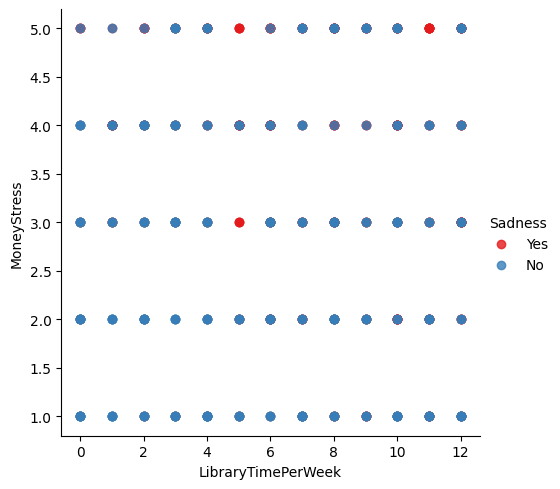

In [42]:
sns.lmplot(x='LibraryTimePerWeek', y='MoneyStress', data=df, hue='Sadness', palette='Set1', fit_reg=False)